In [18]:
import pandas as pd
import numpy as np
import os 
import glob
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, jaccard_score

import seaborn as sns
import matplotlib.pyplot as plt 
import os 
sns.set_context('poster')
sns.set_theme(style="whitegrid")

# Generate RANDOM Baseline

In [7]:
# load answer sheet
answer_sheet = pd.read_csv('../data/num_3classsamples_per_class18000_time32_shape30/answersheet.csv', index_col=0)
answer_sheet = answer_sheet.values.flatten()

In [3]:
# generate random array filled with 1 or zero

recall_list = []
precision_list = []
f1_list = []
accuracy_list = []
jaccard_list = []

for i in range(5000):
    random_array = np.random.randint(2, size=answer_sheet.shape)
    recall = recall_score(answer_sheet, random_array)
    precision = precision_score(answer_sheet, random_array)
    f1 = f1_score(answer_sheet, random_array)
    accuracy = accuracy_score(answer_sheet, random_array)
    jaccard = jaccard_score(answer_sheet, random_array)

    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    jaccard_list.append(jaccard)
    
print(f"recall: {np.mean(recall_list):.3f} ± {np.std(recall_list):.3f}")
print(f"precision: {np.mean(precision_list):.3f} ± {np.std(precision_list):.3f}")
print(f"f1: {np.mean(f1_list):.3f} ± {np.std(f1_list):.3f}")
print(f"accuracy: {np.mean(accuracy_list):.3f} ± {np.std(accuracy_list):.3f}")
print(f"jaccard: {np.mean(jaccard_list):.3f} ± {np.std(jaccard_list):.3f}")


recall: 0.501 ± 0.090
precision: 0.334 ± 0.050
f1: 0.400 ± 0.062
accuracy: 0.501 ± 0.053
jaccard: 0.252 ± 0.048


# Get QR Score Results (Mine)

In [8]:
max_columns = ['Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max', 'Flag', 'EXP_NAME', 'CV_NUM',
       'Model_name', 'exp', 'model_accuracy']

In [9]:
qr_results = pd.read_csv("dataset/squidgame/GAF_qr_squidgame_cwri_results.csv")
qr_results['qr_lambda'] = 0.0

In [10]:
qr_results.head()

,Recall_original,Precision_original,F1_original,Accuracy_original,Jaccard_original,Recall_inverse,Precision_inverse,F1_inverse,Accuracy_inverse,Jaccard_inverse,...,F1_max,Accuracy_max,Jaccard_max,Flag,EXP_NAME,cv_num,model_name,exp,model_accuracy,qr_lambda
0,0.533333,0.363636,0.432432,0.533333,0.275862,0.466667,0.636364,0.538462,0.466667,0.368421,...,0.538462,0.466667,0.368421,inverse,6010,0,shufflenet,EXP6010,0.748472,0.0
1,0.566667,0.320755,0.409639,0.455556,0.257576,0.600000,0.679245,0.637168,0.544444,0.467532,...,0.637168,0.544444,0.467532,inverse,6010,1,shufflenet,EXP6010,0.744722,0.0
2,0.766667,0.418182,0.541176,0.566667,0.370968,0.533333,0.581818,0.556522,0.433333,0.385542,...,0.556522,0.433333,0.385542,inverse,6010,2,shufflenet,EXP6010,0.895417,0.0
3,0.466667,0.311111,0.373333,0.477778,0.229508,0.516667,0.688889,0.590476,0.522222,0.418919,...,0.590476,0.522222,0.418919,inverse,6010,3,shufflenet,EXP6010,0.748889,0.0
4,0.300000,0.187500,0.230769,0.333333,0.130435,0.650000,0.812500,0.722222,0.666667,0.565217,...,0.722222,0.666667,0.565217,inverse,6010,4,shufflenet,EXP6010,0.745278,0.0


In [11]:
# 6100, 6200, 6300, 6400 -> 0.1
# 6101, 6201, 6301, 6401 -> 0.2
# 6102, 6202, 6302, 6402 -> 0.5
# 6103, 6203, 6303, 6403 -> 1.0

def set_qr_lambda(df, list_of_exp_name, qr_lambda):
    df.loc[df['EXP_NAME'].isin(list_of_exp_name), 'qr_lambda'] = qr_lambda
    return df

qr_results = set_qr_lambda(qr_results, [6014, 6015, 6016, 6017], 0.1)
qr_results = set_qr_lambda(qr_results, [6018, 6019, 6020, 6021], 0.2)
qr_results = set_qr_lambda(qr_results, [6022, 6023, 6024, 6025], 0.5)
qr_results = set_qr_lambda(qr_results, [6026, 6027, 6028, 6029], 1.0)


In [12]:
qr_results.groupby(['model_name', 'qr_lambda'])['Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max','model_accuracy'].mean()

/tmp/ipykernel_2894333/1396455938.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qr_results.groupby(['model_name', 'qr_lambda'])['Recall_max', 'Precision_max', 'F1_max',


Recall_max  Precision_max    F1_max  Accuracy_max  \
model_name qr_lambda                                                      
mlpmixer   0.0          0.453333       0.531703  0.475423      0.622222   
           0.1          0.456667       0.518669  0.478475      0.611111   
           0.2          0.536667       0.567748  0.544398      0.588889   
           0.5          0.606667       0.437844  0.508276      0.608889   
           1.0          0.786667       0.637821  0.703250      0.777778   
resnet9    0.0          0.630000       0.729639  0.673283      0.597778   
           0.1          0.886667       0.701623  0.781208      0.833333   
           0.2          0.846667       0.685765  0.752467      0.813333   
           0.5          0.820000       0.770331  0.790215      0.853333   
           1.0          0.860000       0.780651  0.816940      0.871111   
shufflenet 0.0          0.553333       0.679763  0.608970      0.526667   
           0.1          0.920000       0.538316  0.678002      0.706667   
           0.2          0.913333       0.680099  0.777065      0.822222   
           0.5          0.873333       0.744284  0.801458      0.853333   
           1.0          0.853333       0.783200  0.815230      0.868889   
simplevit  0.0          0.733333       0.778980  0.751449      0.677778   
           0.1          0.576667       0.565353  0.553053      0.537778   
           0.2          0.588889       0.438740  0.501505      0.611111   
           0.5          0.636667       0.508729  0.551226      0.604444   
           1.0          0.893333       0.744837  0.811104      0.860000   

                      Jaccard_max  model_accuracy  
model_name qr_lambda                               
mlpmixer   0.0           0.314145        0.901944  
           0.1           0.315733        0.877361  
           0.2           0.375521        0.871833  
           0.5           0.340964        0.862972  
           1.0           0.550581        0.875583  
resnet9    0.0           0.509904        0.745944  
           0.1           0.641626        0.771056  
           0.2           0.605552        0.789278  
           0.5           0.655648        0.810111  
           1.0           0.692883        0.803528  
shufflenet 0.0           0.441126        0.776556  
           0.1           0.513761        0.746750  
           0.2           0.637634        0.747056  
           0.5           0.672114        0.787139  
           1.0           0.692192        0.801583  
simplevit  0.0           0.606958        0.844417  
           0.1           0.384749        0.851417  
           0.2           0.334994        0.860926  
           0.5           0.383353        0.842222  
           1.0           0.684219        0.797667

In [13]:
view_columns = ['Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max','model_accuracy']
max_columns = ['model_name','qr_lambda','Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max','model_accuracy']


In [22]:
without_qr = qr_results[qr_results['qr_lambda']==0.0]
without_qr.groupby('model_name')[max_columns].agg(['mean', 'std'])

/tmp/ipykernel_2894333/818231621.py:2: FutureWarning: ['model_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  without_qr.groupby('model_name')[max_columns].agg(['mean', 'std'])


qr_lambda      Recall_max           Precision_max            \
                mean  std       mean       std          mean       std   
model_name                                                               
mlpmixer         0.0  0.0   0.453333  0.146439      0.531703  0.071039   
resnet9          0.0  0.0   0.630000  0.093838      0.729639  0.026699   
shufflenet       0.0  0.0   0.553333  0.072072      0.679763  0.085410   
simplevit        0.0  0.0   0.733333  0.104748      0.778980  0.101583   

              F1_max           Accuracy_max           Jaccard_max            \
                mean       std         mean       std        mean       std   
model_name                                                                    
mlpmixer    0.475423  0.072052     0.622222  0.100922    0.314145  0.061036   
resnet9     0.673283  0.060418     0.597778  0.048686    0.509904  0.066606   
shufflenet  0.608970  0.073630     0.526667  0.089787    0.441126  0.079001   
simplevit   0.751449  0.080109     0.677778  0.103935    0.606958  0.099508   

           model_accuracy            
                     mean       std  
model_name                           
mlpmixer         0.901944  0.015161  
resnet9          0.745944  0.001752  
shufflenet       0.776556  0.066471  
simplevit        0.844417  0.045840

In [23]:
with_qr = qr_results[qr_results['qr_lambda']==1.0]
with_qr.groupby('model_name')[max_columns].agg(['mean', 'std'])

/tmp/ipykernel_2894333/2305953824.py:2: FutureWarning: ['model_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  with_qr.groupby('model_name')[max_columns].agg(['mean', 'std'])


qr_lambda      Recall_max           Precision_max            \
                mean  std       mean       std          mean       std   
model_name                                                               
mlpmixer         1.0  0.0   0.786667  0.116905      0.637821  0.104730   
resnet9          1.0  0.0   0.860000  0.059628      0.780651  0.066216   
shufflenet       1.0  0.0   0.853333  0.038006      0.783200  0.095941   
simplevit        1.0  0.0   0.893333  0.027889      0.744837  0.069265   

              F1_max           Accuracy_max           Jaccard_max            \
                mean       std         mean       std        mean       std   
model_name                                                                    
mlpmixer    0.703250  0.106881     0.777778  0.082027    0.550581  0.125550   
resnet9     0.816940  0.049985     0.871111  0.037351    0.692883  0.069627   
shufflenet  0.815230  0.066655     0.868889  0.054659    0.692192  0.091202   
simplevit   0.811104  0.045587     0.860000  0.038968    0.684219  0.064779   

           model_accuracy            
                     mean       std  
model_name                           
mlpmixer         0.875583  0.034572  
resnet9          0.803528  0.009476  
shufflenet       0.801583  0.004787  
simplevit        0.797667  0.010277

In [15]:
qr_results_melt = qr_results[max_columns].melt(id_vars=['model_name','qr_lambda'], value_vars=view_columns)
qr_results_melt

,model_name,qr_lambda,variable,value
0,shufflenet,0.0,Recall_max,0.466667
1,shufflenet,0.0,Recall_max,0.600000
2,shufflenet,0.0,Recall_max,0.533333
3,shufflenet,0.0,Recall_max,0.516667
4,shufflenet,0.0,Recall_max,0.650000
...,...,...,...,...
583,simplevit,1.0,model_accuracy,0.800833
584,simplevit,1.0,model_accuracy,0.804444
585,simplevit,1.0,model_accuracy,0.799167
586,simplevit,1.0,model_accuracy,0.779722


In [16]:
# create custom palette with my own colors
my_palette = {'Recall_max': '#e9311a', 'Precision_max': '#E07A5F', 'F1_max': '#3D405B', 'Accuracy_max': '#ABC270', 'Jaccard_max': '#026c80', 'model_accuracy': '#F2CC8F'}

# create column for color
qr_results_melt['color'] = qr_results_melt['variable'].map(my_palette)


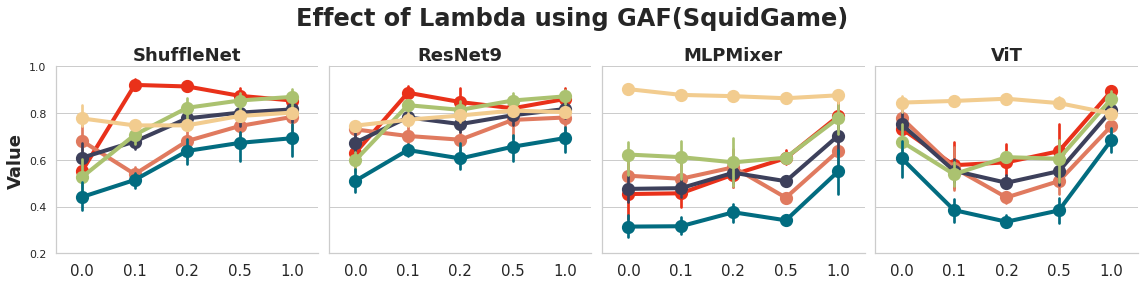

In [20]:
# draw with matplotlib
# set dark background

fig, ax = plt.subplots(1, 4, figsize=(16, 4),
                          sharey=True)
# suptitle
fig.suptitle('Effect of Lambda using GAF(SquidGame)', fontsize=24, fontweight='bold')
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='shufflenet'], x='qr_lambda', y='value', hue='variable', ax=ax[0],
              palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='resnet9'], x='qr_lambda', y='value', hue='variable', ax=ax[1],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='mlpmixer'], x='qr_lambda', y='value', hue='variable', ax=ax[2],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='simplevit'], x='qr_lambda', y='value', hue='variable', ax=ax[3],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)


# leave legend box only for the last plot
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()

# remove y axis label for 1, 2, 3
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')

# set y axis label
ax[0].set_ylabel('Value', fontsize=18, fontweight='bold')

# set title
ax[0].set_title('ShuffleNet', fontsize=18, fontweight='bold')
ax[1].set_title('ResNet9', fontsize=18, fontweight='bold')
ax[2].set_title('MLPMixer', fontsize=18, fontweight='bold')
ax[3].set_title('ViT', fontsize=18, fontweight='bold')

# set x axis label as model place on top of the plot
# ax[0].set_xlabel('ShuffleNet', fontsize=20, fontweight='bold', labelpad=10, x=0.5, y=1.1)
# ax[1].set_xlabel('ResNet9', fontsize=20, fontweight='bold')
# ax[2].set_xlabel('MLPMixer', fontsize=20, fontweight='bold')
# ax[3].set_xlabel('ViT', fontsize=20, fontweight='bold')
for i in range(4):
    # set x axis label
    # ax[i].set_xlabel('QR Lambda', fontsize=20)
    # remove spines 
    ax[i].spines[['top', 'right']].set_visible(False)
    # leave some space between x axis label and x axis ticks
    ax[i].xaxis.labelpad = 10
    # set x axis ticks fontsize
    # ax[i].set_xlabel(r'$\lambda$', fontsize=20, fontweight='bold')
    # remove x label
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', labelsize=15)
    # set y ticks 
    ax[i].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])

ax[3].legend_.remove()
# save
plt.tight_layout()
plt.savefig('results/lambdaablation/GAF_squidgame_lambda_ablation.png', dpi=300, bbox_inches='tight')
            